## Big Data Mart Sales Problem

In [250]:
# Importing main required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from numpy.random import randn
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score
import seaborn as sns
import pickle

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from scipy.stats import expon,norm,boxcox
from sklearn.preprocessing import PowerTransformer
from scipy.stats.stats import pearsonr
from scipy.stats import boxcox,norm


from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.metrics import classification_report, confusion_matrix, precision_recall_curve, auc, roc_curve

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
from sklearn import linear_model
from sklearn import model_selection
from sklearn import preprocessing
import matplotlib.pyplot as plt
import seaborn as sns



from sklearn.metrics import roc_curve

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix

from sklearn import tree
from sklearn import svm
from sklearn import ensemble
from sklearn import neighbors
from sklearn import linear_model
from sklearn import metrics
from sklearn import preprocessing
plt.style.use('fivethirtyeight') # Good looking plots
import seaborn as sns
import statsmodels.api as sm
from statsmodels.formula.api import logit, probit, poisson, ols
from sklearn import datasets
from scipy.stats import expon,norm,boxcox
from sklearn.model_selection import KFold,cross_val_score,GridSearchCV,RandomizedSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import Lasso,Ridge,RidgeCV
from sklearn.preprocessing import normalize,StandardScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR

import warnings
warnings.filterwarnings('ignore')

### Data Input

In [251]:
# Read the given data set
train=pd.read_csv('/Users/rakeshchandramaity/Desktop/ml/bigdatamart_rep.csv')
test=pd.read_csv('/Users/rakeshchandramaity/Desktop/ml/bigdatamart_test.csv')

### Data Analysis

In [252]:
# Head Checking
test.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [253]:
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [254]:
# Tail Checking
test.tail()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
5676,FDB58,10.5,Regular,0.013496,Snack Foods,141.3154,OUT046,1997,Small,Tier 1,Supermarket Type1
5677,FDD47,7.6,Regular,0.142991,Starchy Foods,169.1448,OUT018,2009,Medium,Tier 3,Supermarket Type2
5678,NCO17,10.0,Low Fat,0.073529,Health and Hygiene,118.7440,OUT045,2002,NaN,Tier 2,Supermarket Type1
5679,FDJ26,15.3,Regular,0.000000,Canned,214.6218,OUT017,2007,NaN,Tier 2,Supermarket Type1
5680,FDU37,9.5,Regular,0.104720,Canned,79.7960,OUT045,2002,NaN,Tier 2,Supermarket Type1


In [255]:
# Tail Checking
train.tail()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976
8522,DRG01,14.800,Low Fat,0.044878,Soft Drinks,75.4670,OUT046,1997,Small,Tier 1,Supermarket Type1,765.6700


In [256]:
# Checking the Head & Tril to get an over all Idea about the data.

### First Cut Observations on the Data:

In [257]:
# Understanding the row & column numbers
train.shape

(8523, 12)

### Observation : Not a Big Data Set to most need to take care the Data Loss Aspect.

In [258]:
# Checking that if all the values are numerical or not
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [259]:
train.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [260]:
#Checking for missing/null values.
train.isnull().sum()  

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [261]:
def missing(df):
  number=df.isnull().sum().sort_values(ascending=False)[df.isnull().sum().sort_values(ascending=False)!=0]
  percent=number/len(df)*100
  missing_df=pd.concat((number,percent),keys=['Number','Percent'], axis=1)
  return missing_df

In [262]:
# combining the train and test dataset

data = pd.concat([train, test])

print(data.shape)

(14204, 12)


In [263]:
missing(test)

,Number,Percent
Outlet_Size,1606,28.269671
Item_Weight,976,17.180074


In [264]:
missing(train)

,Number,Percent
Outlet_Size,2410,28.276428
Item_Weight,1463,17.165317


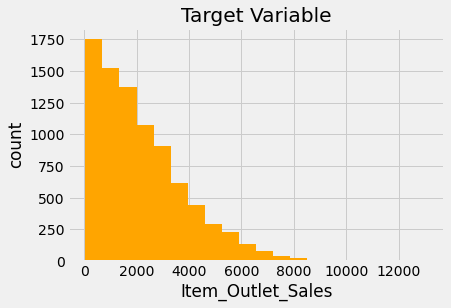

In [265]:
plt.hist(train['Item_Outlet_Sales'], bins = 20, color = 'orange')
plt.title('Target Variable')
plt.xlabel('Item_Outlet_Sales')
plt.ylabel('count')
plt.show()

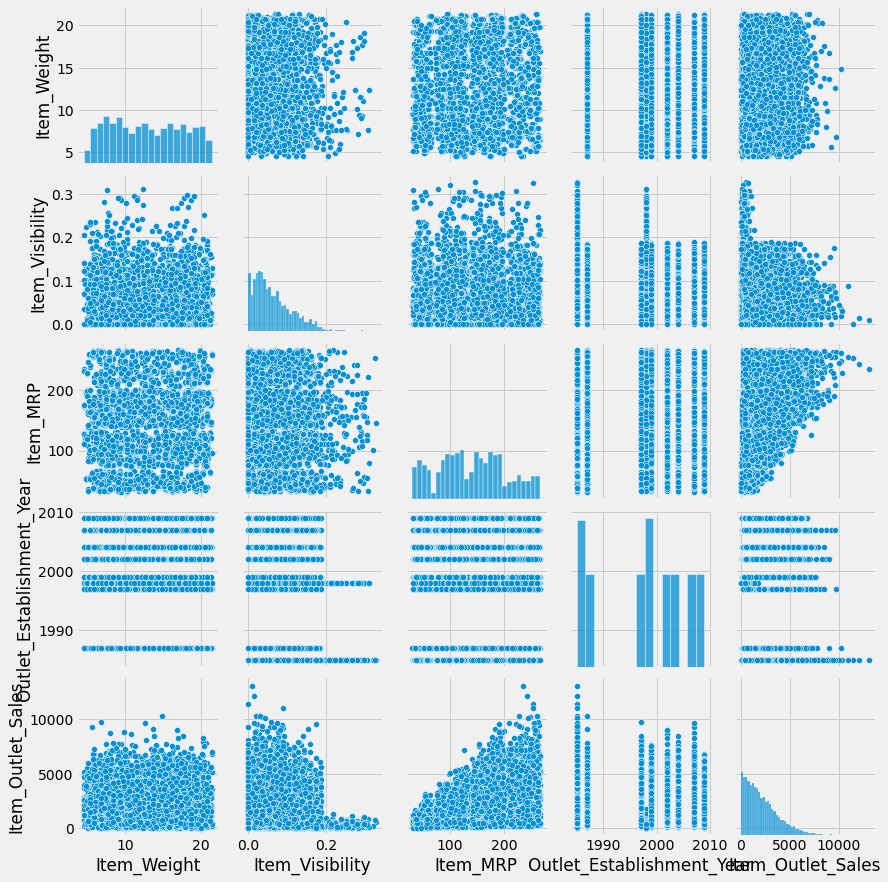

In [266]:
#pairplot
import seaborn as sns
sns.pairplot(train)

In [204]:
train.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

Text(0.5, 1.0, 'Distribution of SalePrice')

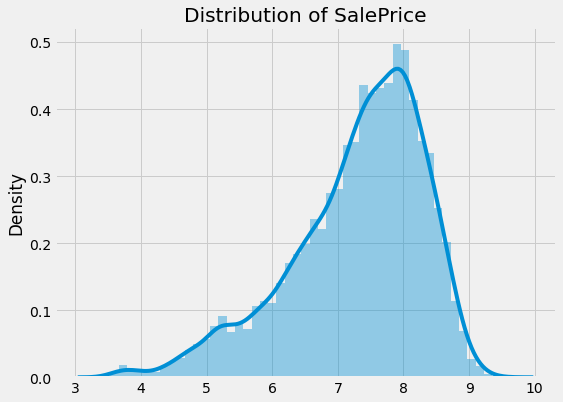

In [111]:
f,ax=plt.subplots(figsize=(8,6))
sns.distplot(x=np.log1p(train['Item_Outlet_Sales']))
ax.set_title('Distribution of SalePrice')

Text(0.5, 1.0, 'Distribution of SalePrice')

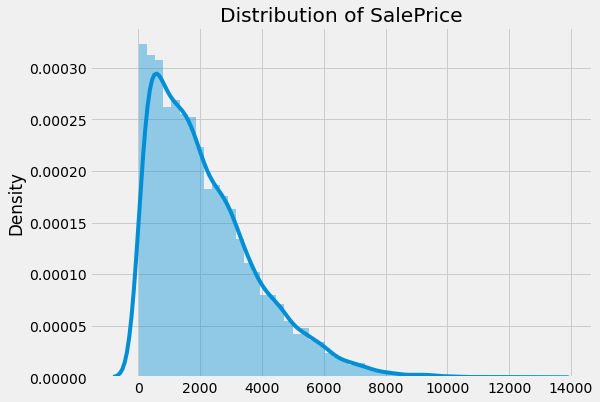

In [112]:
f,ax=plt.subplots(figsize=(8,6))
sns.distplot(x=train['Item_Outlet_Sales'])
ax.set_title('Distribution of SalePrice')

In [113]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


<AxesSubplot:xlabel='Item_MRP', ylabel='Item_Outlet_Sales'>

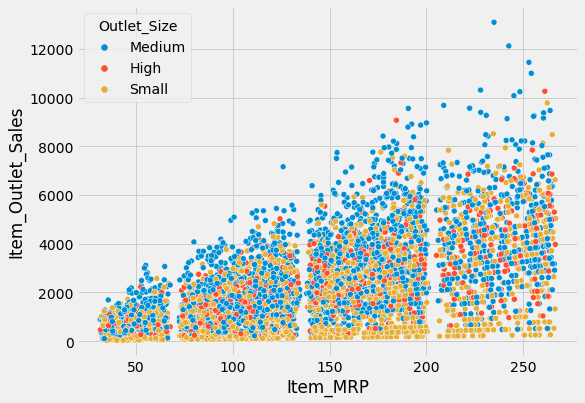

In [115]:
f,ax=plt.subplots(figsize=(8,6))
sns.scatterplot(x='Item_MRP',y='Item_Outlet_Sales',data=train,hue='Outlet_Size')

<AxesSubplot:xlabel='Outlet_Establishment_Year', ylabel='Item_Outlet_Sales'>

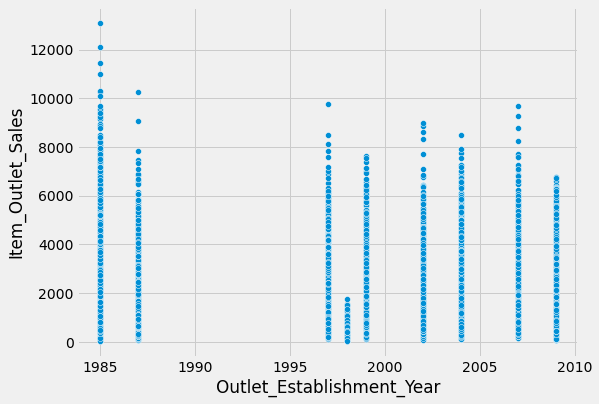

In [116]:
f,ax=plt.subplots(figsize=(8,6))
sns.scatterplot(x='Outlet_Establishment_Year',y='Item_Outlet_Sales',data=train)

<AxesSubplot:xlabel='Outlet_Type', ylabel='Item_Outlet_Sales'>

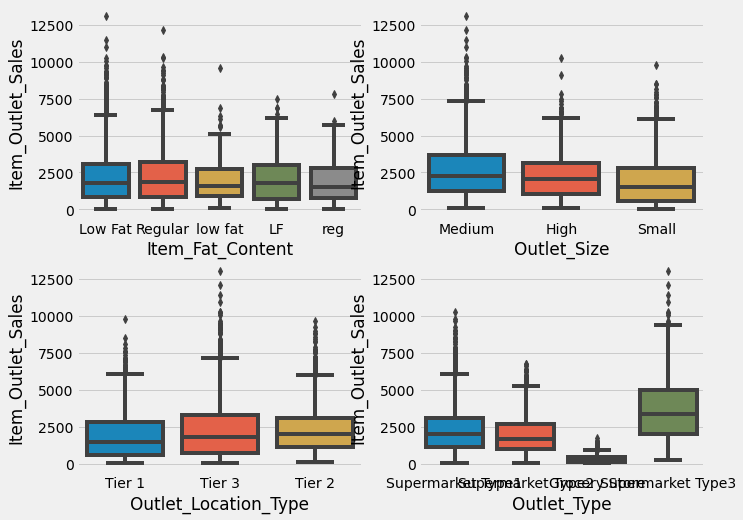

In [117]:
f,ax=plt.subplots(2,2,figsize=(10,8))

sns.boxplot(x='Item_Fat_Content',y='Item_Outlet_Sales',data=train,ax=ax[0,0])
sns.boxplot(x='Outlet_Size',y='Item_Outlet_Sales',data=train,ax=ax[0,1])
sns.boxplot(x='Outlet_Location_Type',y='Item_Outlet_Sales',data=train,ax=ax[1,0])
sns.boxplot(x='Outlet_Type',y='Item_Outlet_Sales',data=train,ax=ax[1,1])

In [118]:
train['Item_Fat_Content']=train['Item_Fat_Content'].apply( lambda x: 'Low Fat' if x in ['Low Fat','low fat','low fat'] else 'Regular')
test['Item_Fat_Content']=test['Item_Fat_Content'].apply( lambda x: 'Low Fat' if x in ['Low Fat','low fat','low fat'] else 'Regular')

<AxesSubplot:xlabel='Item_Fat_Content', ylabel='Item_Outlet_Sales'>

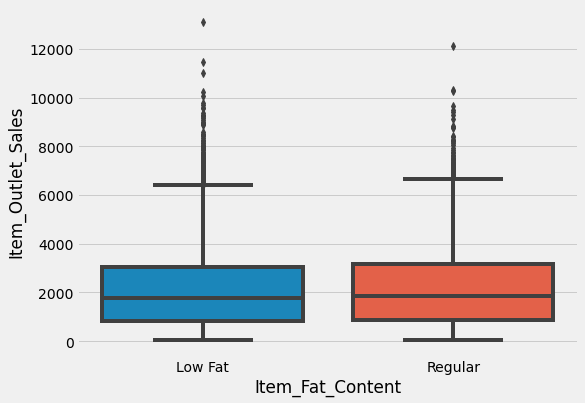

In [119]:
f,ax=plt.subplots(figsize=(8,6))
sns.boxplot(x='Item_Fat_Content',y='Item_Outlet_Sales',data=train)

In [120]:
saleprice=train.Item_Outlet_Sales
saleprice.isnull().any()

False

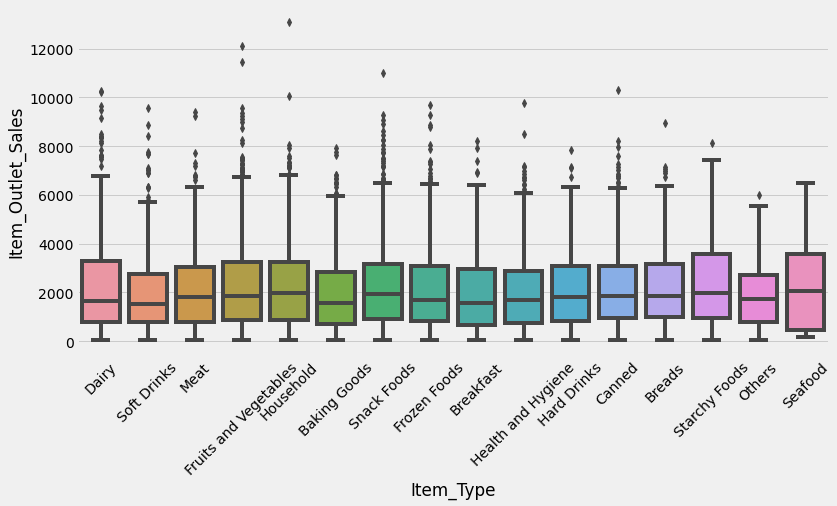

In [121]:
f, ax=plt.subplots(figsize=(12,6))

ax=sns.boxplot(x='Item_Type',y='Item_Outlet_Sales',data=train)
ax= plt.setp(ax.get_xticklabels(), rotation=45)

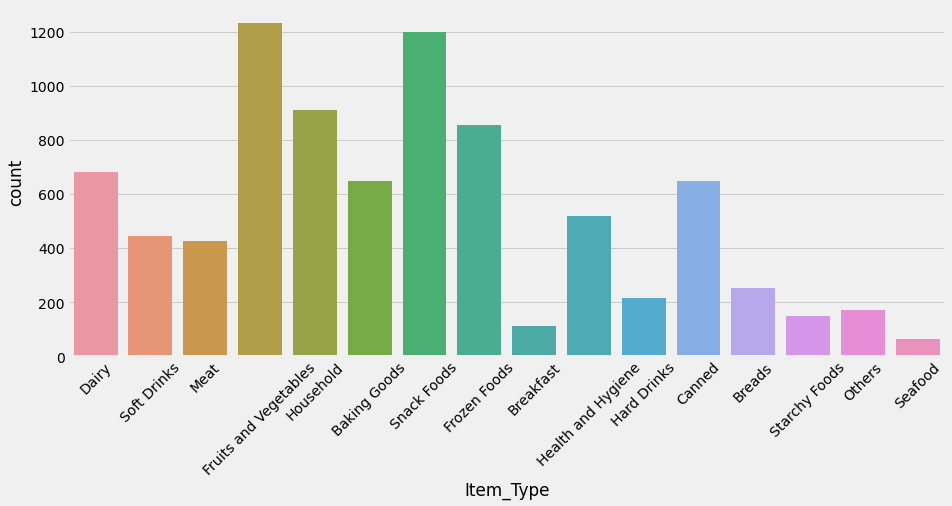

In [122]:
f,ax=plt.subplots(figsize=(14,6))

ax=sns.countplot(x='Item_Type',data=train)
ax= plt.setp(ax.get_xticklabels(), rotation=45)

<AxesSubplot:xlabel='Outlet_Location_Type', ylabel='count'>

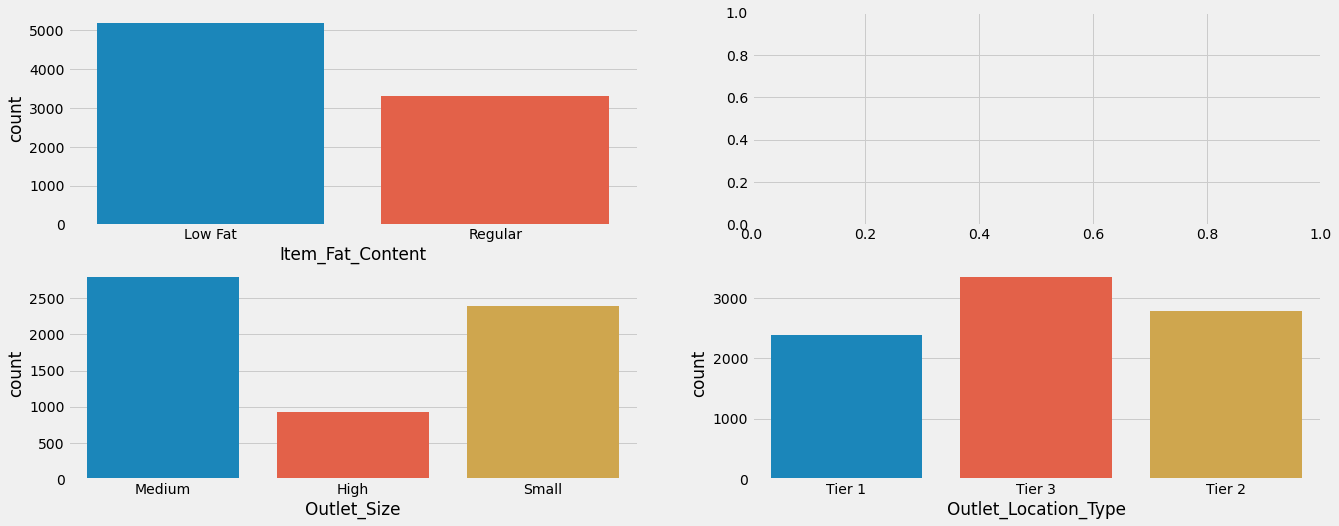

In [123]:
f,ax=plt.subplots(2,2,figsize=(20,8))
sns.countplot(x='Item_Fat_Content',data=train,ax=ax[0,0])
#sns.countplot(x='Item_Type',data=train,ax=ax[0,1])
sns.countplot(x='Outlet_Size',data=train,ax=ax[1,0])
sns.countplot(x='Outlet_Location_Type',data=train,ax=ax[1,1])

Text(0.5, 1.0, 'Number of Outlet Type Based on Location Type')

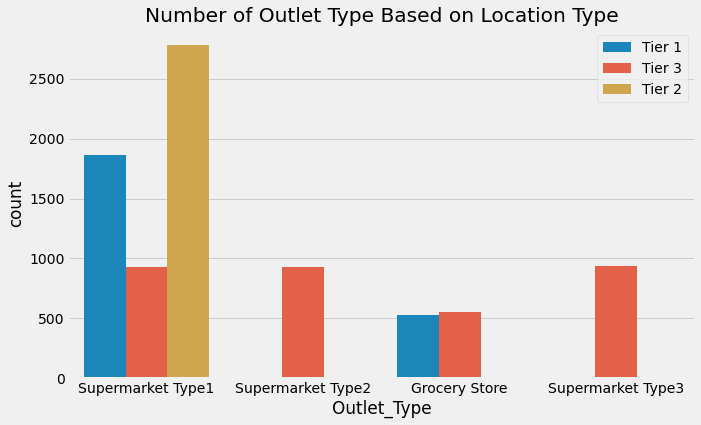

In [124]:
f,ax=plt.subplots(figsize=(10,6))
sns.countplot(x='Outlet_Type',hue='Outlet_Location_Type',data=train)
plt.legend(loc='upper right')
ax.set_title('Number of Outlet Type Based on Location Type')

<AxesSubplot:xlabel='Item_Weight'>

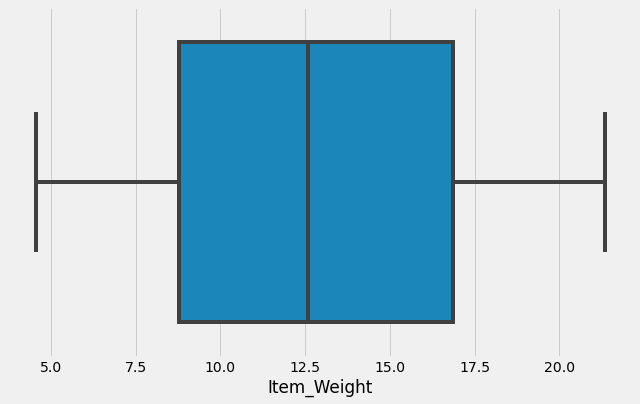

In [125]:
f,ax=plt.subplots(figsize=(10,6))
sns.boxplot(x='Item_Weight',data=train)

In [126]:
train['Item_Weight']=train['Item_Weight'].fillna(train['Item_Weight'].median())
test['Item_Weight']=test['Item_Weight'].fillna(test['Item_Weight'].median())

In [127]:
train['Outlet_Size']= train['Outlet_Size'].fillna(train['Outlet_Size'].mode()[0])
test['Outlet_Size']= test['Outlet_Size'].fillna(test['Outlet_Size'].mode()[0])

In [128]:
missing(train)

,Number,Percent


In [129]:
missing(test)

,Number,Percent


In [130]:
Item_Outlet_Sales=train['Item_Outlet_Sales']
train.drop(columns='Item_Outlet_Sales',inplace=True)

In [131]:
train.drop(columns=['Item_Identifier','Outlet_Identifier'],inplace=True)
item_indentifier=test['Item_Identifier']
test.drop(columns=['Item_Identifier','Outlet_Identifier'],inplace=True)

In [134]:
transformed_sale_value,calculated_lambda_value=boxcox(Item_Outlet_Sales)

<AxesSubplot:ylabel='Density'>

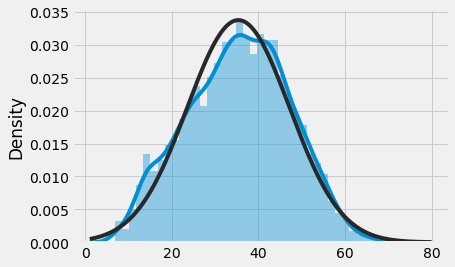

In [135]:
sns.distplot(transformed_sale_value,fit=norm)

<AxesSubplot:ylabel='Density'>

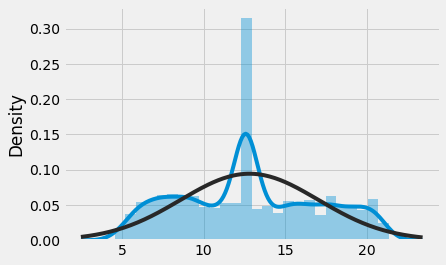

In [136]:
sns.distplot(x=train['Item_Weight'],fit=norm)

<AxesSubplot:ylabel='Density'>

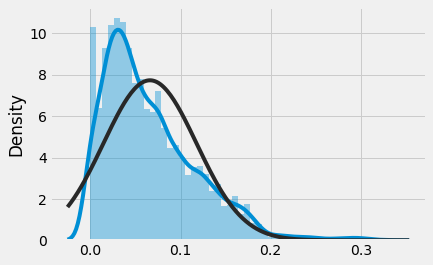

In [137]:
sns.distplot(x=train['Item_Visibility'],fit=norm)

In [138]:
any(train['Item_Visibility']==0),any(test['Item_Visibility']==0)

(True, True)

In [139]:
print(any(train['Item_Visibility']<0))
print(any(test['Item_Visibility']<0))

False
False


<AxesSubplot:ylabel='Density'>

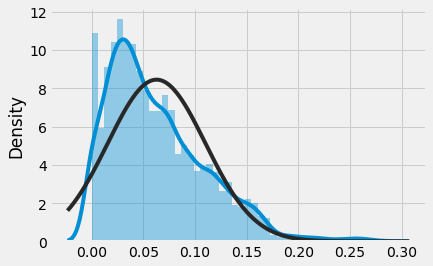

In [140]:
sns.distplot(x=np.log(train['Item_Visibility']+1),fit=norm)

<AxesSubplot:ylabel='Density'>

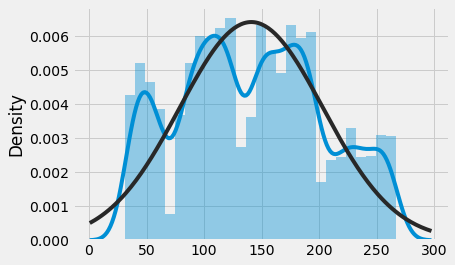

In [141]:
sns.distplot(x=train['Item_MRP'],fit=norm)

<AxesSubplot:ylabel='Density'>

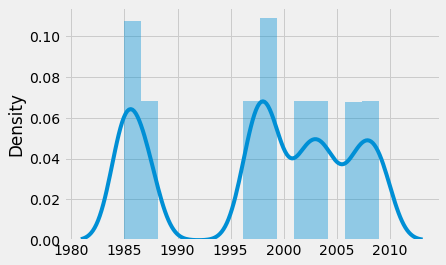

In [142]:
sns.distplot(x=train['Outlet_Establishment_Year'])

In [205]:
# checking the different items in Item Idemtifier

train['Item_Identifier'].value_counts()

FDW13    10
FDG33    10
NCY18     9
FDD38     9
DRE49     9
         ..
FDY43     1
FDQ60     1
FDO33     1
DRF48     1
FDC23     1
Name: Item_Identifier, Length: 1559, dtype: int64

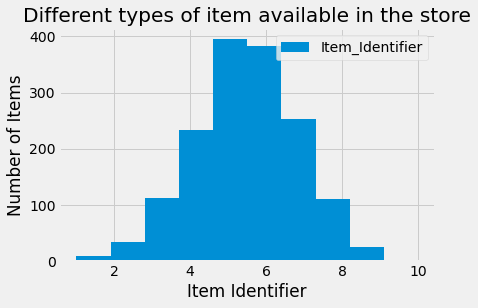

In [206]:
# we will analyze only the training set

train['Item_Identifier'].value_counts(normalize = True)
train['Item_Identifier'].value_counts().plot.hist()
plt.title('Different types of item available in the store')
plt.xlabel('Item Identifier')
plt.ylabel('Number of Items')
plt.legend()
plt.show()

In [207]:
# checking the different items in Item Fat Content

train['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

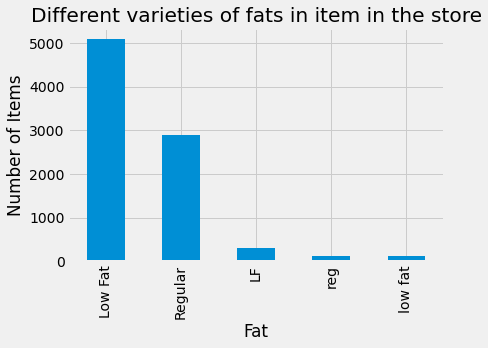

In [208]:
# checking different varieties of item fat content

train['Item_Fat_Content'].value_counts(normalize = True)
train['Item_Fat_Content'].value_counts().plot.bar()
plt.title('Different varieties of fats in item in the store')
plt.xlabel('Fat')
plt.ylabel('Number of Items')
plt.show()

In [209]:
# checking the different items in Item Type

train['Item_Type'].value_counts()

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

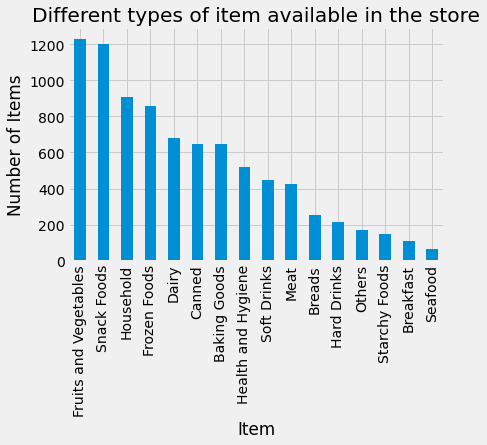

In [210]:
# we will analyze only the training set

train['Item_Type'].value_counts(normalize = True)
train['Item_Type'].value_counts().plot.bar()
plt.title('Different types of item available in the store')
plt.xlabel('Item')
plt.ylabel('Number of Items')
plt.show()

In [211]:
# checking the different types of Outlet Identifier

train['Outlet_Identifier'].value_counts()

OUT027    935
OUT013    932
OUT049    930
OUT046    930
OUT035    930
OUT045    929
OUT018    928
OUT017    926
OUT010    555
OUT019    528
Name: Outlet_Identifier, dtype: int64

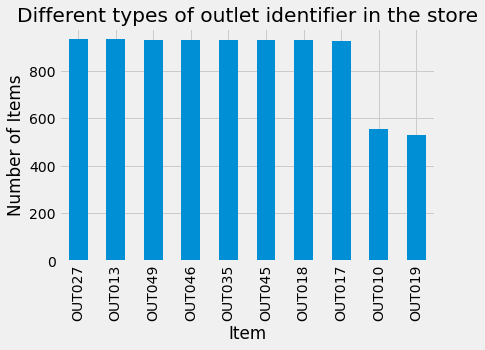

In [212]:
# we will analyze only the training set

train['Outlet_Identifier'].value_counts(normalize = True)
train['Outlet_Identifier'].value_counts().plot.bar()
plt.title('Different types of outlet identifier in the store')
plt.xlabel('Item')
plt.ylabel('Number of Items')
plt.show()

In [213]:
# checking the different types of Outlet Size

train['Outlet_Size'].value_counts()

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

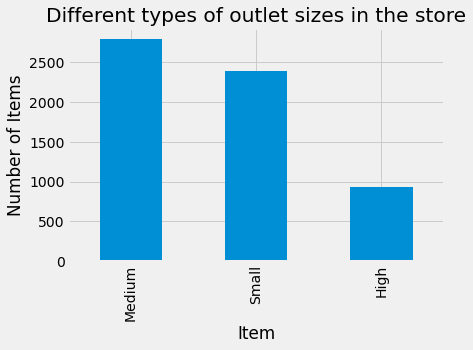

In [214]:
# we will analyze only the training set

train['Outlet_Size'].value_counts(normalize = True)
train['Outlet_Size'].value_counts().plot.bar()
plt.title('Different types of outlet sizes in the store')
plt.xlabel('Item')
plt.ylabel('Number of Items')
plt.show()

In [215]:
# checking different types of items in Outlet Location Type

train['Outlet_Location_Type'].value_counts()

Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: Outlet_Location_Type, dtype: int64

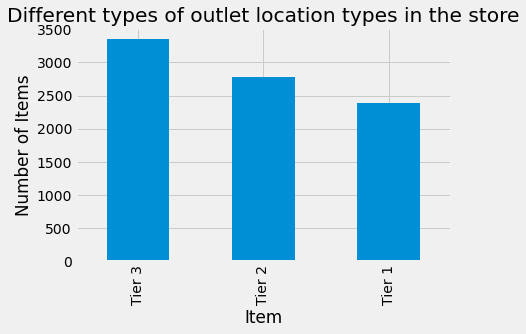

In [216]:
# we will analyze only the training set

train['Outlet_Location_Type'].value_counts(normalize = True)
train['Outlet_Location_Type'].value_counts().plot.bar()
plt.title('Different types of outlet location types in the store')
plt.xlabel('Item')
plt.ylabel('Number of Items')
plt.show()

In [217]:
# checking different types of item in Outlet Type

train['Outlet_Type'].value_counts()

Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int64

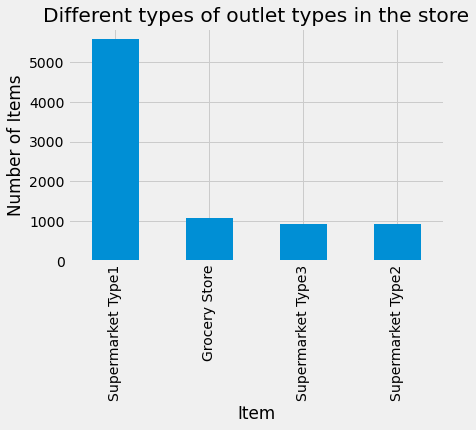

In [218]:
# we will analyze only the training set

train['Outlet_Type'].value_counts(normalize = True)
train['Outlet_Type'].value_counts().plot.bar()
plt.title('Different types of outlet types in the store')
plt.xlabel('Item')
plt.ylabel('Number of Items')
plt.show()

<AxesSubplot:xlabel='Item_Fat_Content'>

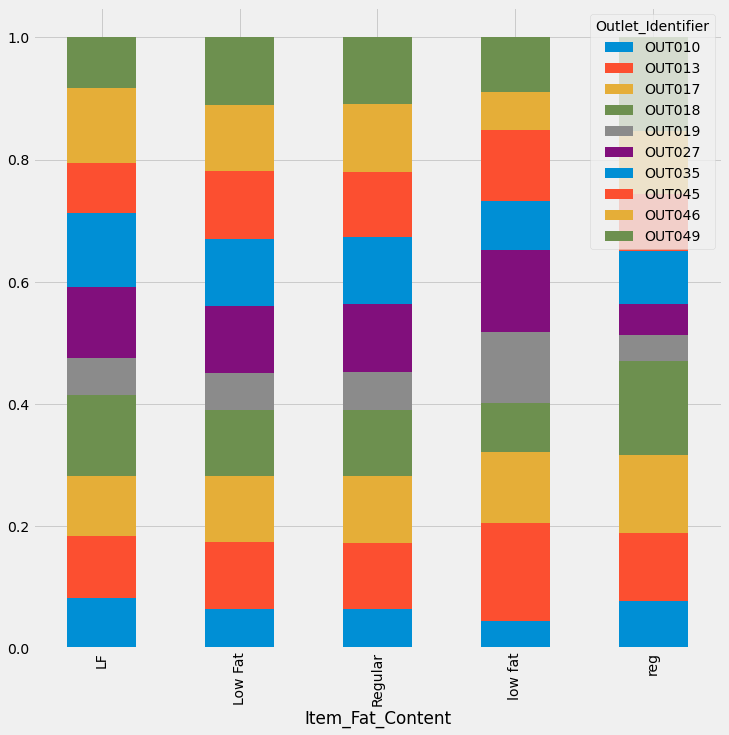

In [219]:
# fat content vs outlet identifier

Item_Fat_Content = pd.crosstab(train['Item_Fat_Content'],train['Outlet_Identifier'])
Item_Fat_Content.div(Item_Fat_Content.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(11, 11))

<AxesSubplot:xlabel='Item_Type'>

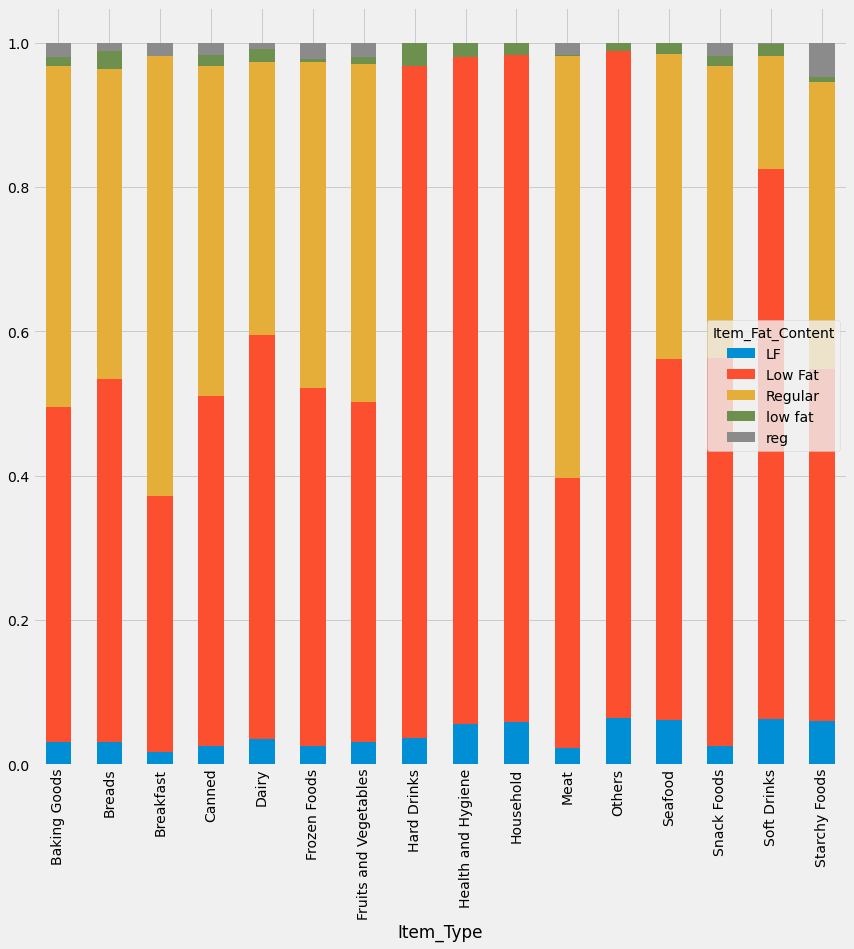

In [220]:
# fat content vs item type

Item_Type = pd.crosstab(train['Item_Type'], train['Item_Fat_Content'])
Item_Type.div(Item_Type.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(13, 13))

In [223]:
# checking unique values in the columns of train dataset

data.apply(lambda x: len(x.unique()))

Item_Identifier               1559
Item_Weight                    416
Item_Fat_Content                 5
Item_Visibility              13006
Item_Type                       16
Item_MRP                      8052
Outlet_Identifier               10
Outlet_Establishment_Year        9
Outlet_Size                      4
Outlet_Location_Type             3
Outlet_Type                      4
Item_Outlet_Sales             3494
dtype: int64

In [224]:
data.isnull().sum()

Item_Identifier                 0
Item_Weight                  2439
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  4016
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales            5681
dtype: int64

In [225]:
# imputing missing values

data['Item_Weight'] = data['Item_Weight'].replace(0, np.NaN)
data['Item_Weight'].fillna(data['Item_Weight'].mean(), inplace = True)

data['Outlet_Size'].fillna(data['Outlet_Size'].mode()[0], inplace = True)

data['Item_Outlet_Sales'] = data['Item_Outlet_Sales'].replace(0, np.NaN)
data['Item_Outlet_Sales'].fillna(data['Item_Outlet_Sales'].mode()[0], inplace = True)

data.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [226]:
# combining reg, Regular and Low Fat, low fat and, LF


data['Item_Fat_Content'] = data['Item_Fat_Content'].replace({'LF': 'Low Fat', 'reg': 'Regular', 'low fat': 'Low Fat'})
data['Item_Fat_Content'].value_counts()

Low Fat    9185
Regular    5019
Name: Item_Fat_Content, dtype: int64

In [227]:
# Getting the first two characters of ID to separate them into different categories

data['Item_Identifier'] = data['Item_Identifier'].apply(lambda x: x[0:2])

data['Item_Identifier'] = data['Item_Identifier'].map({'FD':'Food', 'NC':'Non_Consumable', 'DR':'Drinks'})

data['Item_Identifier'].value_counts()

Food              10201
Non_Consumable     2686
Drinks             1317
Name: Item_Identifier, dtype: int64

In [143]:
norm_sale_price,fitted_lambda=boxcox(saleprice)#fitted_lambda is estimated by maximum likelyhood method

<AxesSubplot:ylabel='Density'>

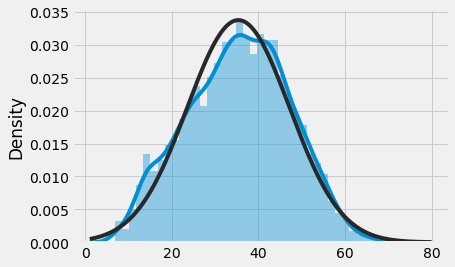

In [144]:
sns.distplot(norm_sale_price,fit=norm)

In [145]:
##  Now checking Corelation 
train.corr()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year
Item_Weight,1.000000,-0.014168,0.024951,0.007739
Item_Visibility,-0.014168,1.000000,-0.001315,-0.074834
Item_MRP,0.024951,-0.001315,1.000000,0.005020
Outlet_Establishment_Year,0.007739,-0.074834,0.005020,1.000000


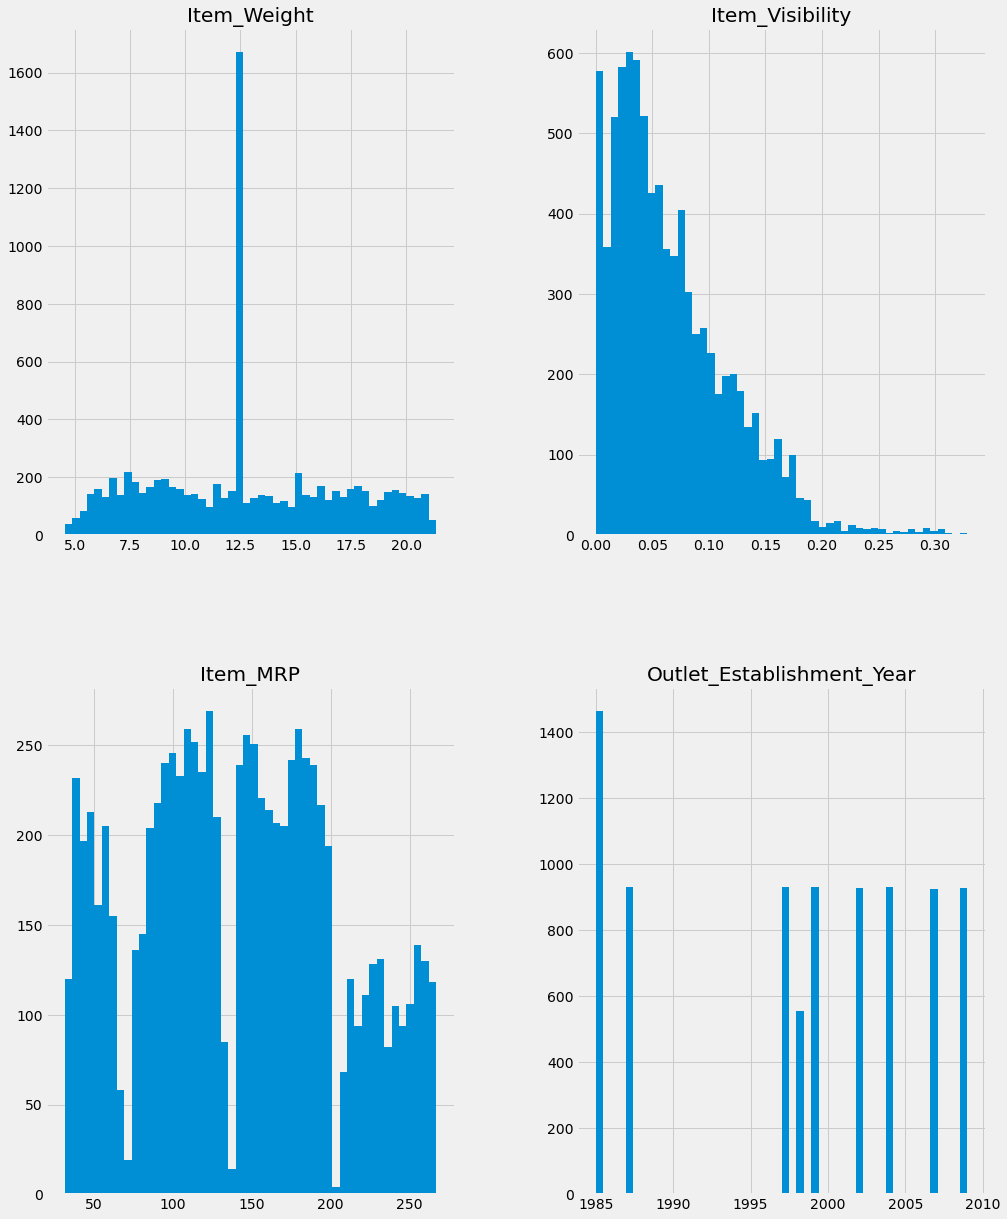

In [146]:
train.hist(figsize=(15,20),bins=50)
plt.show()

<AxesSubplot:>

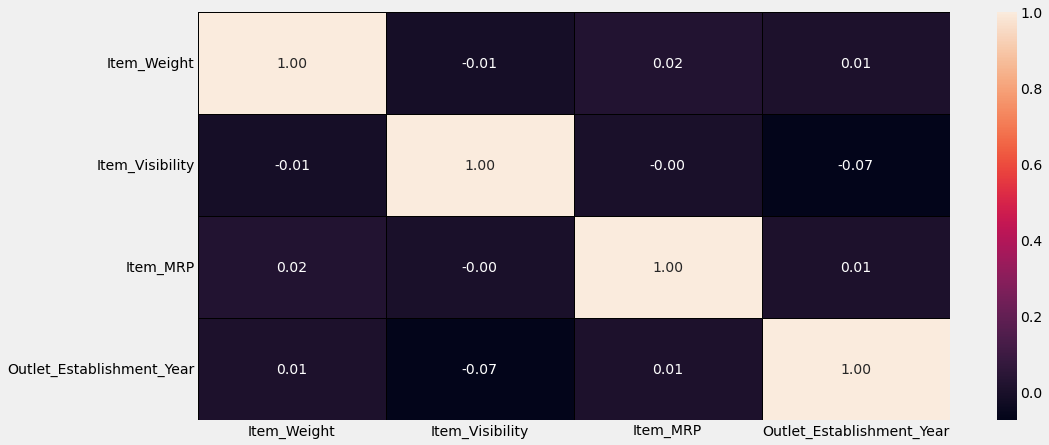

In [147]:
##  Now checking Corelation with the help og Hit Map
plt.figure(figsize=(15,7))
sns.heatmap(train.corr(),annot=True,linewidths=0.5,linecolor='black',fmt= '.2f')

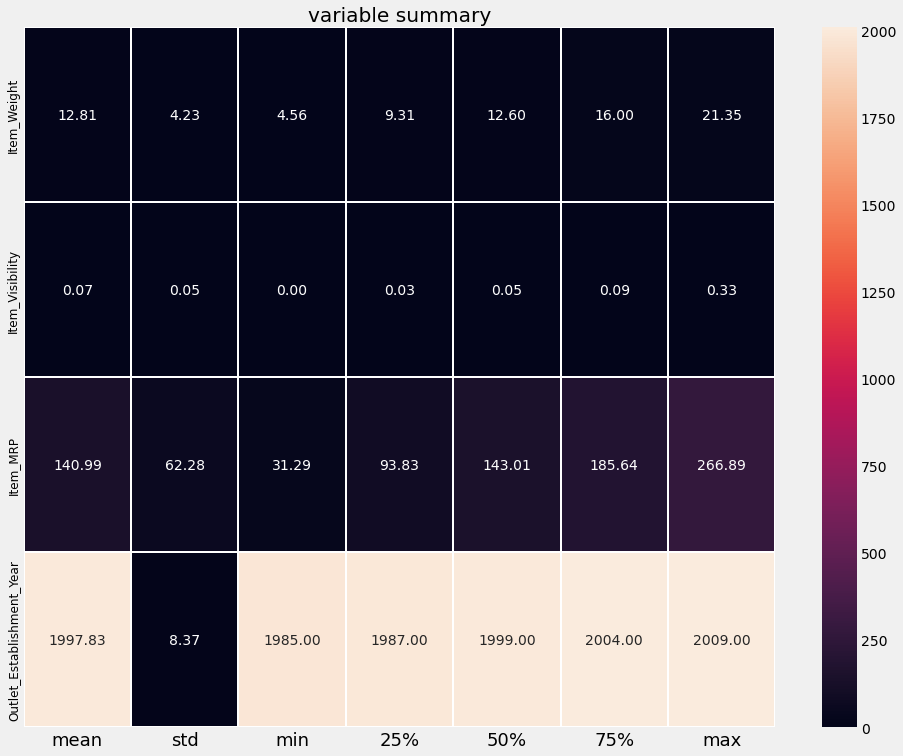

In [148]:
## Need to Check Distributions of Variables with in a hit map.
## Which will give us clear understanding about the variables.

plt.figure(figsize=(15,12))
sns.heatmap(round(train.describe()[1:].transpose(),2),linewidth=2,annot=True,fmt='.2f')
plt.xticks(fontsize=18)
plt.yticks(fontsize=12)
plt.title("variable summary")
plt.show()

In [149]:
# So now checking all the data are in numeric form or Not
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Weight                8523 non-null   float64
 1   Item_Fat_Content           8523 non-null   object 
 2   Item_Visibility            8523 non-null   float64
 3   Item_Type                  8523 non-null   object 
 4   Item_MRP                   8523 non-null   float64
 5   Outlet_Establishment_Year  8523 non-null   int64  
 6   Outlet_Size                8523 non-null   object 
 7   Outlet_Location_Type       8523 non-null   object 
 8   Outlet_Type                8523 non-null   object 
dtypes: float64(3), int64(1), object(5)
memory usage: 599.4+ KB


In [150]:
# checking the columns of the data
train.columns

Index(['Item_Weight', 'Item_Fat_Content', 'Item_Visibility', 'Item_Type',
       'Item_MRP', 'Outlet_Establishment_Year', 'Outlet_Size',
       'Outlet_Location_Type', 'Outlet_Type'],
      dtype='object')

## Enhanced Data Analysis:

In [272]:
#Getting summary metrics for the dataframe
print(data.describe())

        Item_Weight  Item_Visibility      Item_MRP  Outlet_Establishment_Year  \
count  11765.000000     14204.000000  14204.000000               14204.000000   
mean      12.792854         0.065953    141.004977                1997.830681   
std        4.652502         0.051459     62.086938                   8.371664   
min        4.555000         0.000000     31.290000                1985.000000   
25%        8.710000         0.027036     94.012000                1987.000000   
50%       12.600000         0.054021    142.247000                1999.000000   
75%       16.750000         0.094037    185.855600                2004.000000   
max       21.350000         0.328391    266.888400                2009.000000   

       Item_Outlet_Sales  
count        8523.000000  
mean         2181.288914  
std          1706.499616  
min            33.290000  
25%           834.247400  
50%          1794.331000  
75%          3101.296400  
max         13086.964800  


In [273]:
#Checking for missing/null values
data.select_dtypes(include=['object']).isnull().sum()
data.select_dtypes(include=[np.number]).isnull().sum()

Item_Weight                  2439
Item_Visibility                 0
Item_MRP                        0
Outlet_Establishment_Year       0
Item_Outlet_Sales            5681
dtype: int64

In [228]:
# determining the operation peroid of a time

data['Outlet_Years'] = 2013 - data['Outlet_Establishment_Year']
data['Outlet_Years'].value_counts()

28    2439
26    1553
14    1550
16    1550
9     1550
11    1548
4     1546
6     1543
15     925
Name: Outlet_Years, dtype: int64

In [229]:
# removing unnecassary columns from the dataset

#data = data.drop('Item_Identifier', axis = 1)

#print(data.shape)

In [230]:
data['Outlet_Type'].value_counts()

Supermarket Type1    9294
Grocery Store        1805
Supermarket Type3    1559
Supermarket Type2    1546
Name: Outlet_Type, dtype: int64

<AxesSubplot:>

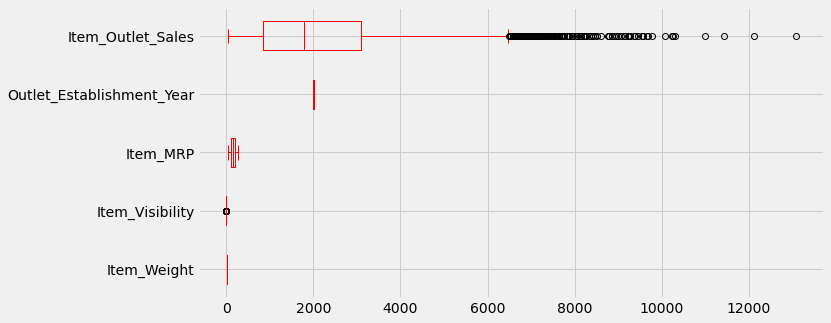

In [276]:
data.plot(kind='box',color='r',vert = False,figsize =(10,5))    #Box Plot

In [231]:
# label encoding

from sklearn.preprocessing import LabelEncoder

data.apply(LabelEncoder().fit_transform)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Outlet_Years
0,1,284,0,1097,4,7567,9,4,1,0,1,2540,4
1,0,57,1,1436,14,632,3,8,1,2,2,422,0
2,1,376,0,1172,10,3897,9,4,1,0,1,1639,4
3,1,393,1,0,6,5626,0,3,1,2,0,670,5
4,2,265,0,0,9,848,1,1,0,2,1,865,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5676,1,298,1,718,13,3881,8,2,2,0,1,835,6
5677,1,180,1,11820,15,5069,3,8,1,2,2,835,0
5678,2,293,0,8009,8,3196,7,5,1,1,1,835,3
5679,1,354,1,0,3,6626,2,7,1,1,1,835,1


In [232]:
# one hot encoding

data = pd.get_dummies(data)

print(data.shape)

(14204, 47)


In [233]:
# splitting the data into dependent and independent variables

x = data.drop('Item_Outlet_Sales', axis = 1)
y = data.Item_Outlet_Sales

print(x.shape)
print(y.shape)

(14204, 46)
(14204,)


In [234]:
# splitting the dataset into train and test

train = data.iloc[:8523,:]
test = data.iloc[8523:,:]

print(train.shape)
print(test.shape)

(8523, 47)
(5681, 47)


In [277]:
train.skew(axis = 0, skipna = True)

Item_Weight                  0.082426
Item_Visibility              1.167091
Item_MRP                     0.127202
Outlet_Establishment_Year   -0.396641
Item_Outlet_Sales            1.177531
dtype: float64

In [279]:
from sklearn.preprocessing import power_transform
train=power_transform(X,method='yeo-johnson')

In [280]:
# making x_train, x_test, y_train, y_test

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3)

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(9942, 46)
(9942,)
(4262, 46)
(4262,)


In [281]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

model1 = LinearRegression()
model1.fit(x_train, y_train)

# predicting the  test set results
y_pred_lr = model1.predict(x_test)
print(y_pred_lr)

# finding the mean squared error and variance
mse = mean_squared_error(y_test, y_pred_lr)
print('RMSE :', np.sqrt(mse))
print('Variance score: %.2f' % r2_score(y_test, y_pred_lr))

[1212. 1408. 2684. ... 2232. 1772. 2892.]
RMSE : 1210.342484418666
Variance score: 0.29


In [285]:
from sklearn.ensemble import AdaBoostRegressor

model= AdaBoostRegressor(n_estimators = 100)
model.fit(x_train, y_train)

# predicting the test set results
y_pred = model.predict(x_test)

# RMSE
mse = mean_squared_error(y_test, y_pred)
print("RMSE :", np.sqrt(mse))

RMSE : 1327.9709049875833


In [ ]:
confusion_mat_log = confusion_matrix(Y_test,Y_pred_log)
print(confusion_mat_log)

In [240]:
from sklearn.ensemble import GradientBoostingRegressor

model = GradientBoostingRegressor()
model.fit(x_train, y_train)

# predicting the test set results
y_pred = model.predict(x_test)
print(y_pred)

# Calculating the root mean squared error
print("RMSE :", np.sqrt(((y_test - y_pred)**2).sum()/len(y_test)))

[2641.83211696 2193.62009202 1162.00843295 ... 1874.75132668 3041.99278668
 2039.83797504]
RMSE : 1234.8581099958797


In [294]:
from sklearn.ensemble import RandomForestRegressor

model4 = RandomForestRegressor(n_estimators = 100 , n_jobs = -1)
model.fit(x_train, y_train)

# predicting the  test set results
y_pred_rf = model.predict(x_test)
print(y_pred_rf)

# finding the mean squared error and variance
mse = mean_squared_error(y_test, y_pred_rf)
print("RMSE :",np.sqrt(mse))
print('Variance score: %.2f' % r2_score(y_test, y_pred_rf))

print("Result :",model.score(x_train, y_train))

[1187.44144863  736.87307613 3145.33236655 ... 2848.99233237 2010.15369776
 3522.49178676]
RMSE : 1312.0149772574657
Variance score: 0.16
Result : 0.1613172127296445


In [295]:
from sklearn.tree import DecisionTreeRegressor

model = DecisionTreeRegressor()
model.fit(x_train, y_train)

# predicting the test set results
y_pred = model.predict(x_test)
print(y_pred)

print(" RMSE : " , np.sqrt(((y_test - y_pred)**2).sum()/len(y_test)))

[ 265.6542  711.0744 6196.6006 ... 2406.2012 3652.5788  958.752 ]
 RMSE :  1735.6144996311075


In [296]:
from sklearn.svm import SVR

model = SVR()
model.fit(x_train, y_train)

# predicting the x test results
y_pred = model.predict(x_test)

# Calculating the RMSE Score
mse = mean_squared_error(y_test, y_pred)
print("RMSE :", np.sqrt(mse))

RMSE : 1608.1780113513119


# Model Saving

In [290]:
import pickle
filename= 'Bigdatamart_predict.pkl'
pickle.dump(model4,open (filename,'wb'))